In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [39]:
X = np.array([[0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)

In [40]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta):
    tol = 1e-4
    max_count = 10000
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            # Stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [41]:
print(X.shape)
eta = .05
w_init = np.random.randn(X.shape[0], 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)

print(w[-1])

(2, 20)
[[-4.09867021]
 [ 1.53189434]]


In [42]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.0344655  0.04974835 0.07130752 0.10121451 0.14175022 0.19499805
  0.19499805 0.26213881 0.34255972 0.43316873 0.52847895 0.62175707
  0.7068194  0.77953523 0.88379889 0.91772879 0.94239713 0.95999132
  0.97236912 0.98696181]]


[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]


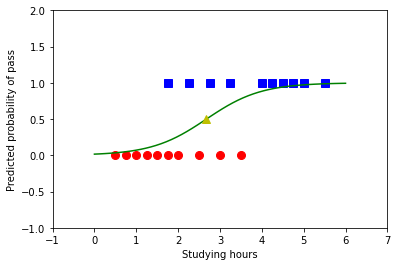

In [59]:
print(X)
X0 = X[1, np.where(y==0)][0]
y0 = np.zeros(X0.shape[0]) # =y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = np.ones(X1.shape[0]) # =y[np.where(y==1)]

plt.plot(X0, y0, 'ro', markersize=8)
plt.plot(X1, y1, 'bs', markersize=8)

xx = np.linspace(0, 6)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
yy = sigmoid(w0 + w1*xx)

plt.plot(xx, yy, 'g-')
plt.plot(abs(w0/w1), .5, 'y^', markersize=8) # Hard threshold (ngưỡng cứng)
plt.axis([-1, 7, -1, 2])
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

In [60]:
# Example of 2D data
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

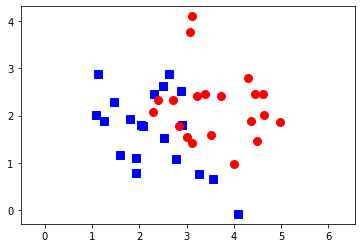

In [67]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.show()

In [79]:
XX = np.concatenate((X0, X1), axis=0).T
yy = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis=1).T
# Xbar
XX = np.concatenate((np.ones((1, 2*N)), XX), axis=0)

eta2 = .05
w2_init = np.random.randn(XX.shape[0], 1)

w2 = logistic_sigmoid_regression(XX, yy, w2_init, eta2)
print(w2[-1])

[[-9.45677497]
 [ 2.23175913]
 [ 1.39524291]]


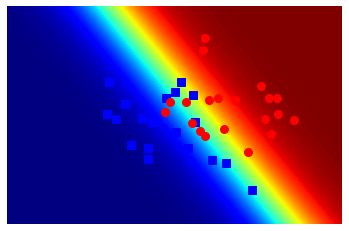

In [115]:
ww0 = w2[-1][0][0]
ww1 = w2[-1][1][0]
ww2 = w2[-1][2][0]
xm = np.arange(-1, 6, .025)
ym = np.arange(-1, 5, .025)
x1m, y1m = np.meshgrid(xm, ym)
zm = sigmoid(ww0 + ww1*x1m + ww2*y1m)

plt.contourf(xm, ym, zm, 200, cmap = 'jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('off')
plt.show()